In [1]:
# import packages
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import torch

%matplotlib inline  

In [2]:
def display(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

In [3]:
def rec_avg(upper_left, w, h, img_path):
    """
    Params:
    upper_left = (x,y)
    w: width
    h: height
    img_path: String
    
    """
    
    x, y = upper_left
    area = (x, y, x+w, y+h)
    
    img = Image.open(img_path)
    img_cropped = img.crop(area)
    plt.imshow(img_cropped)
    plt.show()
    
    rectangle = np.array(img_cropped)
    rectangle_avg = np.mean(rectangle)
    print("Rectangle pixel average: ", rectangle_avg)
    
    return rectangle_avg

In [9]:
def rec_avg_batch(img_path, pivot, w, h):
    """
    Params:
    img_path: PIL image folder 
    pivot = (x, y)
    w: width
    h: height
    
    num_left / num_right : number of rectangles from left or right
    
    """
    imgs = np.array(glob(img_path + '/*')) # np.ndarray
    print('Total number of images: ', len(imgs))
    
    avgs = []
    
    for img in imgs[:]:
        
        # visualize image sample
        print(str(img))
        display(img)
        
        # calc all rectangles from left and right, and
        # append them to avgs 
        
        # rec_pix_avg_cal(img, pivot)
        # img: PIL image
        # pivot: (x,y) upper-left corner 
        
        
        
        
        
        # calculate 1st rectangles from left or right
        x, y = pivot
        # 1st from left
        left_avg = rec_avg((x,y), w, h, img)
        # 1st right right
        right_avg = rec_avg((x+w-2.5,y), w, h, img) # x+200-2.5
        
        
        avgs.append((left_avg, right_avg))
       
        
        
    
    # return avgs
    return avgs

Total number of images:  4
test_images_1\30min.JPG


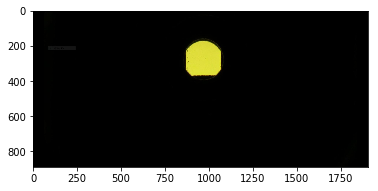

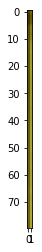

Rectangle pixel average:  92.91041666666666


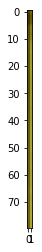

Rectangle pixel average:  92.91041666666666
test_images_1\60min.JPG


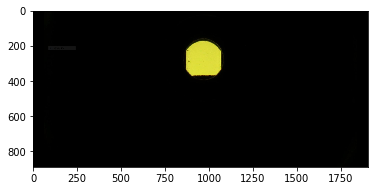

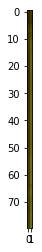

Rectangle pixel average:  55.239583333333336


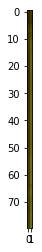

Rectangle pixel average:  55.239583333333336
test_images_1\90min.JPG


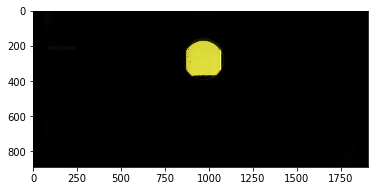

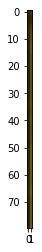

Rectangle pixel average:  45.6


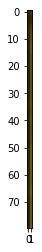

Rectangle pixel average:  45.6
test_images_1\120min.JPG


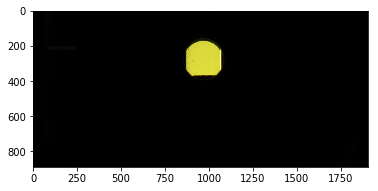

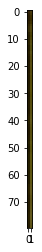

Rectangle pixel average:  41.329166666666666


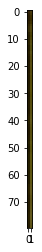

Rectangle pixel average:  41.329166666666666


In [10]:
"""
fixed pivot 
upper_left = (868, 240)
upper_right = (868 + 200, 240)
lower_left = (868, 240 + 80)
lower_right = (868 + 200, 240 + 80)
"""

pivot = (868, 240)
img_path = 'test_images_1'
avgs = rec_avg_batch(img_path, pivot, 2.5, 80)

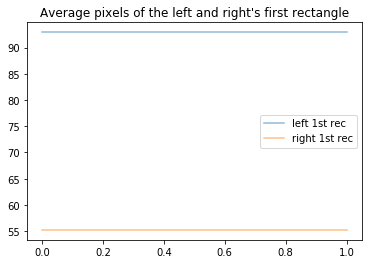

In [11]:
fig, ax = plt.subplots()
avgs = np.array(avgs)
plt.plot(avgs[0], label='left 1st rec', alpha=0.5)
plt.plot(avgs[1], label='right 1st rec', alpha=0.5)
plt.title('Average pixels of the left and right\'s first rectangle')
plt.legend()

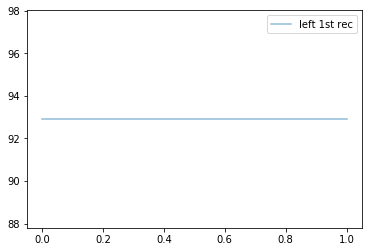

In [12]:
# left 1st rec
plt.plot(avgs[0], label='left 1st rec', alpha=0.5)
plt.legend()

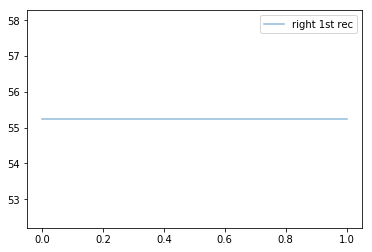

In [15]:
# right 1st rec 
plt.plot(avgs[1], label='right 1st rec', alpha=0.5)
plt.legend()